In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../data/data_prepared.csv")
df_oos = pd.read_csv("../data/oos.csv", index_col=0)

In [5]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

In [6]:
X_train = df_train.drop("Arrival_Delay", axis=1)
y_train = df_train["Arrival_Delay"]

X_test = df_test.drop("Arrival_Delay", axis=1)
y_test = df_test["Arrival_Delay"]

In [7]:
scores = []

## Linear Regression

In [8]:
params = {"fit_intercept": [True]}
cls_1 = GridSearchCV(LinearRegression(), 
                     params, 
                     cv=KFold(n_splits=10), 
                     scoring="neg_mean_absolute_percentage_error")
cls_1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearRegression(), param_grid={'fit_intercept': [True]},
             scoring='neg_mean_absolute_percentage_error')

In [9]:
linear_model = {
    "model": "linear model",
    "params": cls_1.best_params_,
    "score":  cls_1.score(X_test, y_test),
    "mape": MAPE(y_test, cls_1.predict(X_test))
}
scores.append(linear_model)
linear_model

{'model': 'linear model',
 'params': {'fit_intercept': True},
 'score': np.float64(-8.990096325569173),
 'mape': np.float64(8.990096325569173)}

# Lasso

In [10]:
lasso_params = {
    "alpha": [0.05, 0.1, 0.2, 0.5, 1]
}
cls_2 = GridSearchCV(Lasso(),
                     lasso_params,
                     cv=KFold(n_splits=10),
                     scoring="neg_mean_absolute_percentage_error")
cls_2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Lasso(), param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 1]},
             scoring='neg_mean_absolute_percentage_error')

In [11]:
lasso_model = {
    "model": "lasso",
    "params": cls_2.best_params_,
    "score":  cls_2.score(X_test, y_test),
    "mape": MAPE(y_test, cls_2.predict(X_test))
}
scores.append(lasso_model)
lasso_model

{'model': 'lasso',
 'params': {'alpha': 0.05},
 'score': np.float64(-14.401543576948068),
 'mape': np.float64(14.401543576948068)}

# ElasticNet

In [12]:
en_params = {
    "alpha": [0.5, 1, 2, 3, 4],
    "l1_ratio": [0.1, 0.3, 0.5, 1]
}
cls_3 = GridSearchCV(ElasticNet(),
                     en_params,
                     cv=KFold(n_splits=10),
                     scoring="neg_mean_absolute_percentage_error")
cls_3.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.5, 1, 2, 3, 4],
                         'l1_ratio': [0.1, 0.3, 0.5, 1]},
             scoring='neg_mean_absolute_percentage_error')

In [13]:
en_model = {
    "model": "elasticnet",
    "params": cls_3.best_params_,
    "score":  cls_3.score(X_test, y_test),
    "mape": MAPE(y_test, cls_3.predict(X_test))
}
scores.append(en_model)
en_model

{'model': 'elasticnet',
 'params': {'alpha': 4, 'l1_ratio': 0.1},
 'score': np.float64(-11.840682356593135),
 'mape': np.float64(11.840682356593135)}

# SVR

## SVR with linear kernel function

In [14]:
svr_params = {
    "C": [0.001, 0.01, 0.1, 0.5, 1, 10],
    "loss":['epsilon_insensitive', 'squared_epsilon_insensitive'],
    "dual": ["auto"]
}
cls_4 = GridSearchCV(LinearSVR(),
                     svr_params,
                     cv=KFold(n_splits=5),
                     scoring="neg_mean_absolute_percentage_error",
                     verbose=1)
cls_4.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10], 'dual': ['auto'],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [15]:
svr_linear = {
    "model": "svr_linear",
    "score":  cls_4.score(X_test, y_test),
    "params": cls_4.best_params_,
    "mape": MAPE(y_test, cls_4.predict(X_test))
}
scores.append(svr_linear)
svr_linear

{'model': 'svr_linear',
 'score': np.float64(-8.947158808886645),
 'params': {'C': 0.1, 'dual': 'auto', 'loss': 'epsilon_insensitive'},
 'mape': np.float64(8.947158808886645)}

# SVR

In [16]:
df_train_10p = df_train.sample(int(0.1*len(df)))

X_train_10p = df_train_10p.drop("Arrival_Delay", axis=1)
y_train_10p = df_train_10p["Arrival_Delay"]

In [17]:
svr_params = {
    "kernel": ["poly", "rbf", "sigmoid"],
    "degree": [3,5,7],
    "coef0": [0,1,2,4,8],
    "gamma": [0.0001, 0.01, "auto", "scale"],
    "C": [0.001, 0.01, 1, 10]
}
cls_5 = RandomizedSearchCV(SVR(),
                     svr_params,
                     cv=KFold(n_splits=5),
                     scoring="neg_mean_absolute_percentage_error",
                     random_state=42,
                     n_iter=5,
                     verbose=1)
cls_5.fit(X_train_10p, y_train_10p)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVR(), n_iter=5,
                   param_distributions={'C': [0.001, 0.01, 1, 10],
                                        'coef0': [0, 1, 2, 4, 8],
                                        'degree': [3, 5, 7],
                                        'gamma': [0.0001, 0.01, 'auto',
                                                  'scale'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   random_state=42,
                   scoring='neg_mean_absolute_percentage_error', verbose=1)

In [18]:
svr_model = {
    "model": "svr",
    "score":  cls_5.score(X_test, y_test),
    "params": cls_5.best_params_,
    "mape": MAPE(y_test, cls_5.predict(X_test))
}
scores.append(svr_model)
svr_model

{'model': 'svr',
 'score': np.float64(-8.89672371791746),
 'params': {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'coef0': 2, 'C': 1},
 'mape': np.float64(8.89672371791746)}

# KNeighbors

In [19]:
df_train_10p = df_train.sample(int(0.1*len(df)))

X_train_10p = df_train_10p.drop("Arrival_Delay", axis=1)
y_train_10p = df_train_10p["Arrival_Delay"]

In [20]:
knr_params = {
    "n_neighbors": [1, 2, 5, 10, 15],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "euclidean", "manhattan"]
}
cls_4 = RandomizedSearchCV(KNeighborsRegressor(),
                     knr_params,
                     scoring="neg_mean_absolute_percentage_error",
                     random_state=42,
                     n_iter=5,
                     verbose=1)
cls_4.fit(X_train_10p, y_train_10p)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=KNeighborsRegressor(), n_iter=5,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [1, 2, 5, 10, 15],
                                        'weights': ['uniform', 'distance']},
                   random_state=42,
                   scoring='neg_mean_absolute_percentage_error', verbose=1)

In [21]:
kn_model = {
    "model": "knn",
    "score":  cls_4.score(X_test, y_test),
    "params": cls_4.best_params_,
    "mape": MAPE(y_test, cls_4.predict(X_test))
}
scores.append(kn_model)
kn_model

{'model': 'knn',
 'score': np.float64(-12.229969801792185),
 'params': {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'minkowski'},
 'mape': np.float64(12.229969801792185)}

In [22]:
df_scores = pd.DataFrame(scores)
df_scores

,model,params,score,mape
0,linear model,{'fit_intercept': True},-8.990096,8.990096
1,lasso,{'alpha': 0.05},-14.401544,14.401544
2,elasticnet,"{'alpha': 4, 'l1_ratio': 0.1}",-11.840682,11.840682
3,svr_linear,"{'C': 0.1, 'dual': 'auto', 'loss': 'epsilon_in...",-8.947159,8.947159
4,svr,"{'kernel': 'poly', 'gamma': 0.01, 'degree': 3,...",-8.896724,8.896724
5,knn,"{'weights': 'uniform', 'n_neighbors': 15, 'met...",-12.229970,12.229970


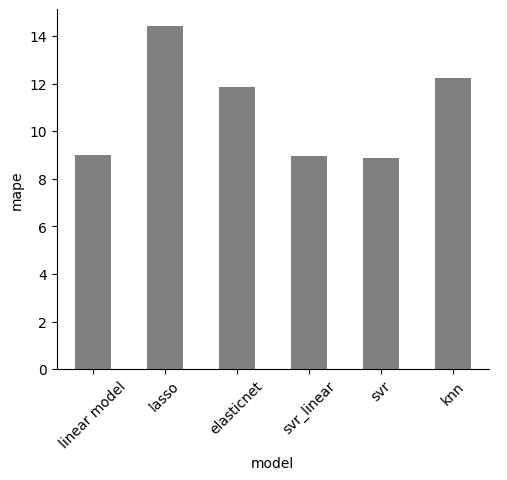

In [23]:

plot = sns.catplot(data=df_scores, x="model", y="mape", color="grey", width=0.5, kind="bar").despine();
plot.set_xticklabels(labels=df_scores["model"].values, rotation=45); 
plt.subplots_adjust(bottom=0.25)
# fig = plot.figure
# fig.savefig("mape.png", transparent=True) 